# Network characterization (part 2)
In this notebook:
* Creation of four synthetic models 
* Comparison between synthetic models and RW
     * Degree
     * Clustering Coefficient
     * Connected Component Analysis
     * Density Analysis
     * Path Analysis
     * Node Assortativity
    

### Load libraries and model creation

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import powerlaw
import matplotlib.colors as mcolors
from operator import itemgetter
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_palette("Set2")
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set_style(style = "white")

In [2]:
df = pd.read_csv("../data_collection/data_biden/df_per_grafo_pesato.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   
del df['Unnamed: 0']
del df['id_source']
del df['id_target']

In [3]:
df.source = df.source.astype(str)
df.target = df.target.astype(str)

rw = nx.from_pandas_edgelist(df, source="source", target = "target", create_using=nx.MultiDiGraph(), edge_attr = "weights")
#coverto il grafo diretto in indiretto
rw = rw.to_undirected() #multigrafo (più collegamenti tra gli stessi nodi)


In [4]:
df

,source,target,weights
0,scienceinvestme,JoeBiden,1.000000
1,elnurrik3,POTUS,0.661017
2,dmaga101,JoeBiden,0.661017
3,slothsforme,POTUS,0.491525
4,natashaejs,ProjectLincoln,0.457627
...,...,...,...
32434,goldbaron08,CHIZMAGA,0.000000
32435,goldbaron08,1JohnEBravo,0.000000
32436,goinglikesixty,kaitlancollins,0.000000
32437,goinglikesixty,carolstam7,0.000000


In [5]:
#k è il numero di nearest neighbour
#p = 0.2 small world, perché l'average short distance del rw è 5 (e può essere considerato sw)
ws = nx.watts_strogatz_graph(22737, k=4, p=0.2)

In [6]:
#p che esista un link tra due nodi (collegata al <k>, quindi p*N=<k>) = 0.00001
er = nx.erdos_renyi_graph(22737, 0.00012535, directed = False)

In [7]:
nx.write_gexf(er, "json/Biden_ER.gexf")

In [8]:
er = nx.read_gexf("json/Biden_ER.gexf")

In [9]:
#Number of edges to attach from a new node to existing nodes: 2 (trovato come <k>/2)
ba = nx.barabasi_albert_graph(22737, 2)


In [10]:
nx.write_gexf(ba, "json/Biden_BA.gexf")

In [11]:
#printare il grado medio in modo tale da vedere se coincide con la mia rete reale

In [12]:
#stessa distribuzione della mia rete reale
sequence = [i[1] for i in rw.degree()]
sequence

[22,
 1314,
 13,
 487,
 21,
 6,
 65,
 106,
 14,
 1046,
 19,
 8,
 49,
 5,
 93,
 75,
 81,
 83,
 19,
 87,
 37,
 83,
 207,
 45,
 30,
 33,
 8,
 76,
 20,
 175,
 44,
 6,
 33,
 65,
 1,
 35,
 70,
 49,
 4,
 120,
 1,
 69,
 15,
 9,
 71,
 29,
 177,
 11,
 180,
 18,
 8,
 195,
 23,
 35,
 25,
 160,
 136,
 145,
 166,
 33,
 108,
 111,
 111,
 3,
 4,
 59,
 54,
 11,
 23,
 50,
 58,
 254,
 2,
 90,
 34,
 8,
 8,
 2,
 1,
 137,
 1,
 34,
 57,
 19,
 8,
 16,
 61,
 10,
 66,
 15,
 44,
 10,
 4,
 28,
 31,
 11,
 4,
 2,
 44,
 5,
 19,
 50,
 10,
 40,
 5,
 47,
 1,
 2,
 63,
 4,
 51,
 31,
 49,
 3,
 32,
 56,
 6,
 35,
 1,
 2,
 9,
 32,
 11,
 6,
 3,
 45,
 49,
 2,
 1,
 2,
 2,
 24,
 22,
 75,
 17,
 28,
 1,
 35,
 33,
 36,
 57,
 12,
 87,
 1,
 38,
 26,
 14,
 3,
 1,
 48,
 19,
 94,
 1,
 7,
 54,
 17,
 7,
 62,
 24,
 14,
 91,
 24,
 1,
 5,
 17,
 53,
 1,
 76,
 1,
 11,
 1,
 53,
 2,
 14,
 3,
 15,
 1,
 91,
 2,
 11,
 23,
 1,
 39,
 1,
 68,
 8,
 3,
 14,
 1,
 56,
 30,
 149,
 18,
 11,
 9,
 16,
 17,
 26,
 1,
 8,
 23,
 1,
 11,
 1,
 1,
 41,
 5,
 6,
 1,
 

In [13]:
cm = nx.configuration_model(sequence)

In [14]:
nx.write_gexf(cm, "json/Biden_CM.gexf")

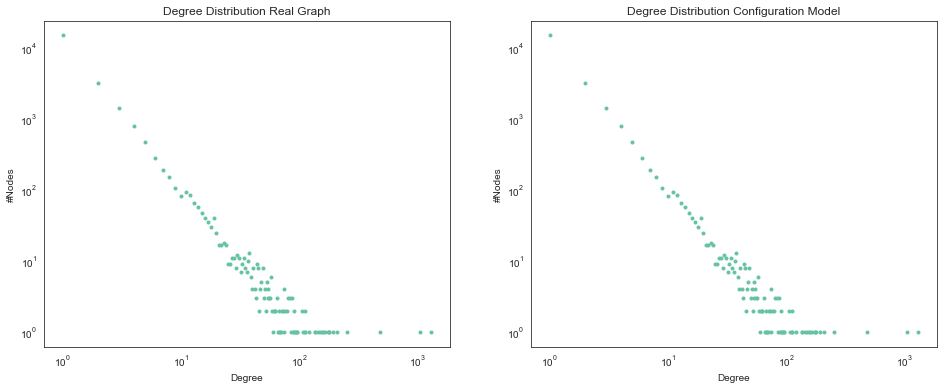

In [15]:
hist_o = nx.degree_histogram(rw)
hist = nx.degree_histogram(cm)

fig = plt.figure(figsize=(16, 6)) 
plt.subplot(1, 2, 1)
plt.plot(range(0, len(hist_o)), hist_o, ".")
plt.title("Degree Distribution Real Graph")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution Configuration Model")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

### Basic Measures

In [16]:
print("Number of nodes in rw: ", rw.number_of_nodes())
print("Number of nodes in er: ", er.number_of_nodes())
print("Number of nodes in ws: ", ws.number_of_nodes())
print("Number of nodes in ba: ", ba.number_of_nodes())
print("Number of nodes in cm: ", cm.number_of_nodes())

Number of nodes in rw:  22737
Number of nodes in er:  22737
Number of nodes in ws:  22737
Number of nodes in ba:  22737
Number of nodes in cm:  22737


In [17]:
print("Number of edges in rw: ", rw.number_of_edges())
print("Number of edges in er: ", er.number_of_edges())
print("Number of edges in ws: ", ws.number_of_edges()) 
print("Number of edges in ba: ", ba.number_of_edges())
print("Number of edges in cm: ", cm.number_of_edges())

Number of edges in rw:  32438
Number of edges in er:  32521
Number of edges in ws:  45474
Number of edges in ba:  45470
Number of edges in cm:  32438


In [18]:
print("is rw directed?: ", rw.is_directed())
print("is er directed?: ", er.is_directed())
print("is ws directed?: ", ws.is_directed())
print("is ba directed?: ", ba.is_directed())
print("is cm directed?: ", cm.is_directed())

is rw directed?:  False
is er directed?:  False
is ws directed?:  False
is ba directed?:  False
is cm directed?:  False


### Average Degree & Distribution Analysis

In [19]:
rw_ad = sum(dict(rw.degree()).values())/float(len(rw))
er_ad = sum(dict(er.degree()).values())/float(len(er))
ws_ad = sum(dict(ws.degree()).values())/float(len(ws))
ba_ad = sum(dict(ba.degree()).values())/float(len(ba))
cm_ad = sum(dict(cm.degree()).values())/float(len(cm))



print("Average Degree rw: ", rw_ad)
print("Average Degree er: ", er_ad)
print("Average Degree ws: ", ws_ad)
print("Average Degree ba: ", ba_ad)
print("Average Degree cm: ", cm_ad)

Average Degree rw:  2.85332277785108
Average Degree er:  2.8606236530764835
Average Degree ws:  4.0
Average Degree ba:  3.999648150591547
Average Degree cm:  2.85332277785108


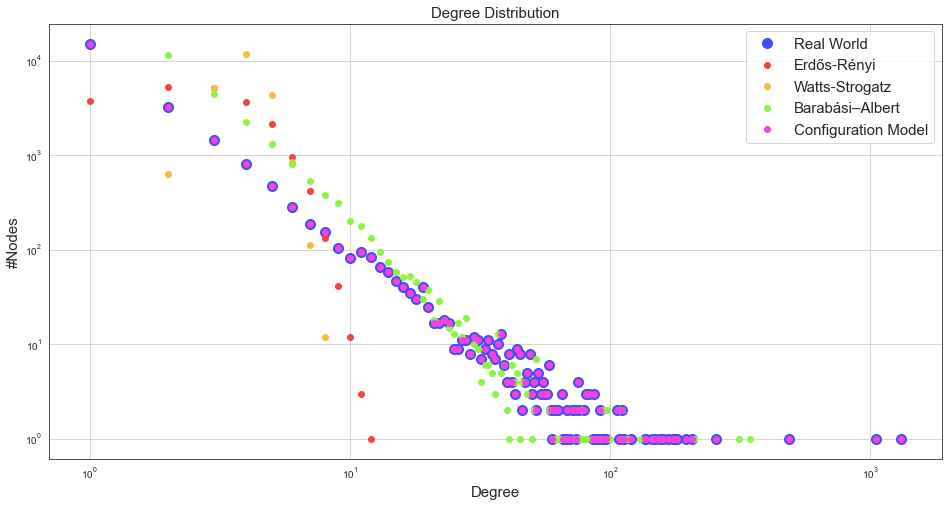

In [21]:
rw_hist = nx.degree_histogram(rw)
er_hist = nx.degree_histogram(er)
ws_hist = nx.degree_histogram(ws)
ba_hist = nx.degree_histogram(ba)
cm_hist = nx.degree_histogram(cm)


plt.figure(figsize=(16,8))
labels =["Real World", "Erdős-Rényi", "Watts-Strogatz", "Barabási–Albert", "Configuration Model"]
plt.plot(range(0, len(rw_hist)), rw_hist, "o", markersize=10, color = '#424ef5')
plt.plot(range(0, len(er_hist)), er_hist, "o", color = '#f54242')
plt.plot(range(0, len(ws_hist)), ws_hist, "o", color = '#f5bc42')
plt.plot(range(0, len(ba_hist)), ba_hist, "o", color = '#8df542')
plt.plot(range(0, len(cm_hist)), cm_hist, "o", color = '#f542da')
plt.title("Degree Distribution", fontsize=15)
plt.xlabel("Degree", fontsize=15)
plt.ylabel("#Nodes", fontsize=15)
plt.grid()
plt.legend(labels, fontsize=15)
plt.loglog()
plt.show()

### Components Analysis

In [213]:
rw_comps = list(nx.connected_components(rw))
er_comps = list(nx.connected_components(er))
ws_comps = list(nx.connected_components(ws))
ba_comps = list(nx.connected_components(ba))
cm_comps = list(nx.connected_components(cm))



print("Number of connected components rw: ", len(rw_comps))
print("Number of connected components er: ", len(er_comps))
print("Number of connected components ws: ", len(ws_comps))
print("Number of connected components ba: ", len(ba_comps))
print("Number of connected components cm: ", len(cm_comps))



Number of connected components rw:  1182
Number of connected components er:  1388
Number of connected components ws:  1
Number of connected components ba:  1
Number of connected components cm:  1927


In [214]:
rw_comps_sorted = sorted(rw_comps, key=len, reverse = True) 
er_comps_sorted = sorted(er_comps, key=len, reverse = True) 
ws_comps_sorted = sorted(ws_comps, key=len, reverse = True) 
ba_comps_sorted = sorted(ba_comps, key=len, reverse = True) 
cm_comps_sorted = sorted(cm_comps, key=len, reverse = True) 

print("Number of nodes/users in the biggest connected component rw: ", len(max(rw_comps_sorted)))
print("Number of nodes/users in the biggest connected component er: ", len(max(er_comps_sorted)))
print("Number of nodes/users in the biggest connected component ws: ", len(max(ws_comps_sorted)))
print("Number of nodes/users in the biggest connected component ba: ", len(max(ba_comps_sorted)))
print("Number of nodes/users in the biggest connected component cm: ", len(max(cm_comps_sorted)))

Number of nodes/users in the biggest connected component rw:  19675
Number of nodes/users in the biggest connected component er:  21180
Number of nodes/users in the biggest connected component ws:  22737
Number of nodes/users in the biggest connected component ba:  22737
Number of nodes/users in the biggest connected component cm:  18629


### Diameter and Path

In [215]:
rw_diameter = nx.diameter(rw.subgraph(rw_comps[0]))
er_diameter = nx.diameter(er.subgraph(er_comps[0]))
ws_diameter = nx.diameter(ws.subgraph(ws_comps[0]))
ba_diameter = nx.diameter(ba.subgraph(ba_comps[0]))
cm_diameter = nx.diameter(cm.subgraph(cm_comps[0]))


In [216]:
print ("The diameter of the rw is: ", rw_diameter) 
print ("The diameter of the er is: ", er_diameter) 
print ("The diameter of the ws is: ", ws_diameter) 
print ("The diameter of the ba is: ", ba_diameter) 
print ("The diameter of the cm is: ", cm_diameter) 

The diameter of the rw is:  15
The diameter of the er is:  23
The diameter of the ws is:  18
The diameter of the ba is:  9
The diameter of the cm is:  13


In [217]:
#average distance in the giant component
rw_path = nx.average_shortest_path_length(rw.subgraph(rw_comps_sorted[0]))
er_path = nx.average_shortest_path_length(er.subgraph(er_comps_sorted[0]))
ws_path = nx.average_shortest_path_length(ws.subgraph(ws_comps_sorted[0]))
ba_path = nx.average_shortest_path_length(ba.subgraph(ba_comps_sorted[0]))
cm_path = nx.average_shortest_path_length(cm.subgraph(cm_comps_sorted[0]))


In [218]:
print("Average shortest path (rw):", rw_path)
print("Average shortest path (er):", er_path)
print("Average shortest path (ws):", ws_path)
print("Average shortest path (ba):", ba_path)
print("Average shortest path (cm):", cm_path)

Average shortest path (rw): 5.229745838101331
Average shortest path (er): 9.362136162012355
Average shortest path (ws): 10.527601248242107
Average shortest path (ba): 5.3324848270359
Average shortest path (cm): 4.665894461745158


### Density & clustering

In [219]:
rw_density = nx.density(rw)
print("Density (rw):", rw_density)
er_density = nx.density(er)
print("Density (er):", er_density)
ws_density = nx.density(ws)
print("Density (ws):", ws_density)
ba_density = nx.density(ba)
print("Density (ba):", ba_density)
cm_density = nx.density(cm)
print("Density (cm):", cm_density)

Density (rw): 0.00012549801098922763
Density (er): 0.00012690627524719912
Density (ws): 0.00017593244194229416
Density (ba): 0.00017591696651088787
Density (cm): 0.00012549801098922763


In [220]:
#vedere se funziona altrimenti cambiare tutto con nx.Graph(g)
rw_graph = nx.Graph(rw)
er_graph = nx.Graph(er)
ws_graph = nx.Graph(ws)
ba_graph = nx.Graph(ba)
cm_graph = nx.Graph(cm)

rw_clustering = nx.average_clustering(rw_graph)
print("Average Clustering Coefficient (rw):", rw_clustering)
er_clustering = nx.average_clustering(er_graph)
print("Average Clustering Coefficient (er):", er_clustering)
ws_clustering = nx.average_clustering(ws_graph)
print("Average Clustering Coefficient (ws):", ws_clustering)  
ba_clustering = nx.average_clustering(ba_graph)
print("Average Clustering Coefficient (ba):", ba_clustering)
cm_clustering = nx.average_clustering(cm_graph)
print("Average Clustering Coefficient (cm):", cm_clustering)

Average Clustering Coefficient (rw): 0.001601181565265985
Average Clustering Coefficient (er): 0.00012510201189446475
Average Clustering Coefficient (ws): 0.2638060053154375
Average Clustering Coefficient (ba): 0.002674314715667175
Average Clustering Coefficient (cm): 0.008187047393501297


### Centrality 
Vedo se ci sono le stesse distribuzioni di betweenness centrality

In [221]:
#vedere se funziona altrimenti cambiare tutto con nx.Graph(g)
rw_betweenness = nx.betweenness_centrality(rw_graph)
rw_ranks = [(k, v) for k, v in sorted(rw_betweenness.items(), key=lambda item: -item[1])]
print(rw_ranks[0:5])

print("\n --------------------------------------")

er_betweenness = nx.betweenness_centrality(er_graph)
er_ranks = [(k, v) for k, v in sorted(er_betweenness.items(), key=lambda item: -item[1])]
print(er_ranks[0:5])

print("\n --------------------------------------")

ws_betweenness = nx.betweenness_centrality(ws_graph)
ws_ranks = [(k, v) for k, v in sorted(ws_betweenness.items(), key=lambda item: -item[1])]
print(ws_ranks[0:5])

print("\n --------------------------------------")

ba_betweenness = nx.betweenness_centrality(ba_graph)
ba_ranks = [(k, v) for k, v in sorted(ba_betweenness.items(), key=lambda item: -item[1])]
print(ba_ranks[0:5])

print("\n --------------------------------------")

cm_betweenness = nx.betweenness_centrality(cm_graph)
cm_ranks = [(k, v) for k, v in sorted(cm_betweenness.items(), key=lambda item: -item[1])]
print(cm_ranks[0:5])



[('JoeBiden', 0.2638096311010423), ('realDonaldTrump', 0.1663914032893342), ('POTUS', 0.0838527309934754), ('blesamerica', 0.033280916725252116), ('thehill', 0.02666457059788305)]

 --------------------------------------
[('16301', 0.004135015310811159), ('4755', 0.003993492950603989), ('748', 0.003943828902903287), ('16463', 0.0038379878352772026), ('3298', 0.0037377089162157952)]

 --------------------------------------
[(10349, 0.0037290010208836403), (22084, 0.003538751946729018), (3198, 0.002996758081190025), (18749, 0.0029958243069370598), (1015, 0.0029905353906584955)]

 --------------------------------------
[(2, 0.22796957168157184), (0, 0.15278599959492992), (13, 0.09007153236435622), (14, 0.05736175294168234), (19, 0.05682854717303562)]

 --------------------------------------
[(1, 0.20433442208816238), (9, 0.1589999095247084), (3, 0.06204315454387833), (71, 0.026194146380590453), (51, 0.019813127280797142)]


### Newman's Assortativity

In [222]:
rw_assortativity = nx.degree_assortativity_coefficient(rw)
print("Assortativity (rw): ", rw_assortativity)
er_assortativity = nx.degree_assortativity_coefficient(er)
print("Assortativity (er): ", er_assortativity)
ws_assortativity = nx.degree_assortativity_coefficient(ws)
print("Assortativity (ws): ", ws_assortativity)
ba_assortativity = nx.degree_assortativity_coefficient(ba)
print("Assortativity (ba): ", ba_assortativity)
cm_assortativity = nx.degree_assortativity_coefficient(cm)
print("Assortativity (cm): ", cm_assortativity)

Assortativity (rw):  -0.06851335430205654
Assortativity (er):  0.00010868951293510794
Assortativity (ws):  -0.039494809794085414
Assortativity (ba):  -0.03131430603857534
Assortativity (cm):  -0.01485226257142003
